### VITON dataset

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset

DATA_PATH = '/home/foksly/Documents/shad/utils/data/viton_resize/'
TRAIN_IMAGE = '/home/foksly/Documents/shad/utils/data/viton_resize/train/image/'
TRAIN_CLOTH = '/home/foksly/Documents/shad/utils/data/viton_resize/train/cloth/'
TRAIN_MASK = '/home/foksly/Documents/shad/utils/data/viton_resize/train/image-parse/'

In [42]:
def plot_sample(idx):
    fig, axs = plt.subplots(1, 3, figsize=(12, 10))
    axs[0].imshow(Image.open(f'{TRAIN_IMAGE}/{idx}_0.jpg'))
    axs[1].imshow(Image.open(f'{TRAIN_CLOTH}/{idx}_1.jpg'))
    axs[2].imshow(Image.open(f'{TRAIN_MASK}/{idx}_0.png'))
    plt.show()

In [76]:
mask = np.asarray(Image.open(f'{TRAIN_MASK}/002744_0.png'))

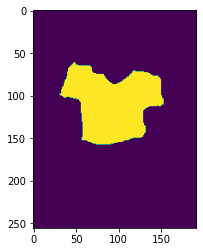

In [77]:
plt.imshow(np.where(mask == 5, 1, 0))

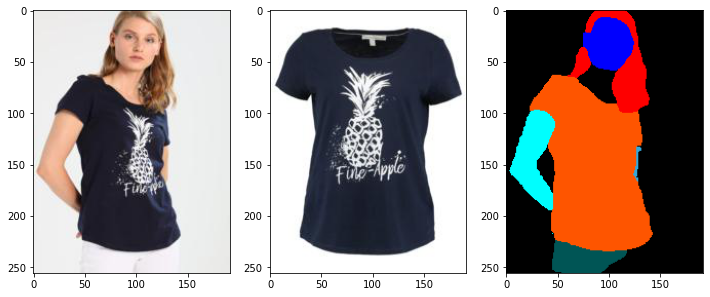

In [43]:
plot_sample('011202')

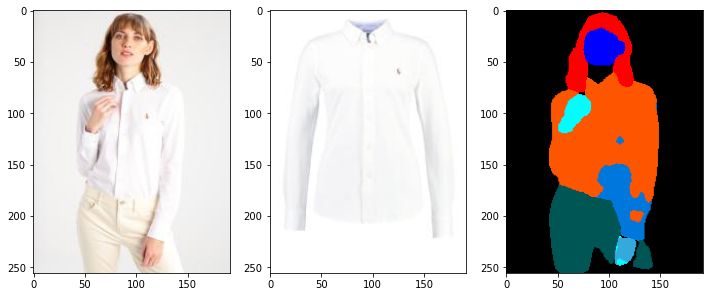

In [44]:
plot_sample('008377')

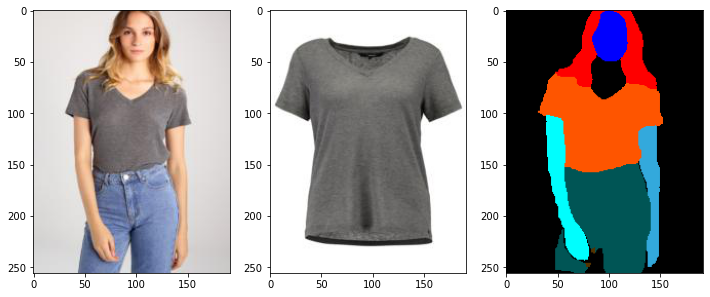

In [45]:
plot_sample('002744')

#### Create custom dataset

In [78]:
import os
import random
from torchvision import transforms


class VitonDatset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root, train=True, transform=None):
        self.root = f'{root}/train' if train else f'{root}/test'
        self.transform = transform or transforms.ToTensor()
        self.train = train
        self.ids = self._get_ids()

    def _get_ids(self):
        files = os.listdir(f'{self.root}/image')
        files_ids = [file.split('_')[0] for file in files]
        return files_ids

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        image = Image.open(f'{self.root}/image/{self.ids[idx]}_0.jpg')
        mask = np.asarray(Image.open(f'{self.root}/image-parse/{self.ids[idx]}_0.png'))
        mask = np.where(mask == 5, 1, 0)
        
        cloth = Image.open(f'{self.root}/cloth/{self.ids[idx]}_1.jpg')
        cloth_random = Image.open(f'{self.root}/cloth/{random.choice(self.ids)}_1.jpg')

        return tuple(map(self.transform, [image, mask, cloth, cloth_random]))

In [79]:
dataset = VitonDatset(DATA_PATH)

In [94]:
def plot_random_sample(dataset):
    idx = random.randint(0, len(dataset))
    sample = dataset[idx]
    to_numpy = lambda x: x.permute(1, 2, 0).numpy()
    
    fig, axs = plt.subplots(1, 4, figsize=(12, 10))
    for i in range(4):
        axs[i].imshow(to_numpy(sample[i]))
    plt.show()

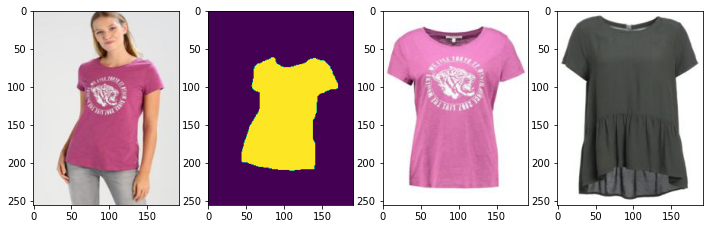

In [95]:
plot_random_sample(dataset)

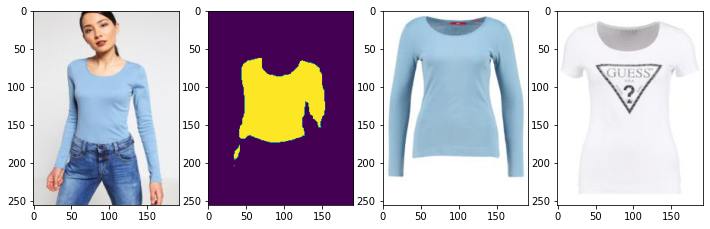

In [96]:
plot_random_sample(dataset)

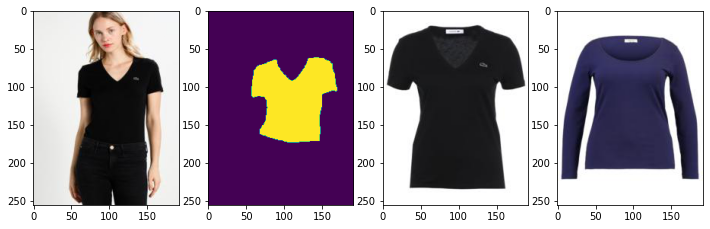

In [97]:
plot_random_sample(dataset)

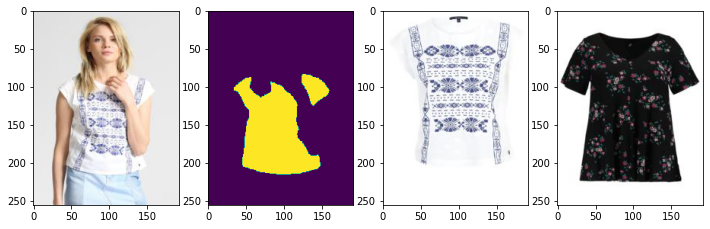

In [101]:
plot_random_sample(dataset)